<a href="https://colab.research.google.com/github/luigiselmi/dl_tensorflow/blob/main/ml_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning fundamentals
One fundamental issue in machine learning is overfitting. One has to find the best trade-off between training a model, using the data available, that should also work well with unseen data. the trade-off is between optimization and generalization. The usual behavior while training a model is that the model improves, that is the validation error decreases, till a minimum after a certain number of epochs and after that the error starts to increase again. One source of overfitting is noisy training data, when in the training set there are examples that are outliers or that are mislabeled. We can see what happens when we add white noise images or black images to the MNIST dataset, a set of 60k 28x28 pixels images of digits from 0 to 9.

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), _ = mnist.load_data()
train_images.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

We show the first 10 MNIST train images

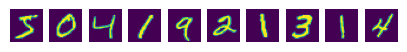

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(5, 5))
for i in range(0, 10):
  ax[i].set_axis_off()
  ax[i].imshow(train_images[i])

We reshape and normalize the MNIST data

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
train_images.shape

(60000, 784)

We create two new datasets by adding an equal number of white noise and black images to the MNIST dataset

In [ ]:
train_images_with_noise_channels = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)

We create a model of with single layer of 512 units and an output softmax layer to classify the images among 10 classes

In [ ]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Now we use the model to create two instances using the noisy and the black datasets

In [ ]:
model = get_model()
history_noise = model.fit(train_images_with_noise_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 9s 23ms/step - loss: 0.6247 - accuracy: 0.8129 - val_loss: 0.2748 - val_accuracy: 0.9195
Epoch 2/10
375/375 [==============================] - 7s 18ms/step - loss: 0.2558 - accuracy: 0.9212 - val_loss: 0.2096 - val_accuracy: 0.9393
Epoch 3/10
375/375 [==============================] - 8s 21ms/step - loss: 0.1681 - accuracy: 0.9477 - val_loss: 0.1602 - val_accuracy: 0.9526
Epoch 4/10
375/375 [==============================] - 9s 23ms/step - loss: 0.1202 - accuracy: 0.9622 - val_loss: 0.1399 - val_accuracy: 0.9603
Epoch 5/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0885 - accuracy: 0.9719 - val_loss: 0.1541 - val_accuracy: 0.9558
Epoch 6/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0659 - accuracy: 0.9793 - val_loss: 0.1318 - val_accuracy: 0.9629
Epoch 7/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.1404 - val_accuracy: 0.9590

In [ ]:
model = get_model()
history_zeros = model.fit(train_images_with_zeros_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 9s 22ms/step - loss: 0.2960 - accuracy: 0.9136 - val_loss: 0.1426 - val_accuracy: 0.9588
Epoch 2/10
375/375 [==============================] - 7s 18ms/step - loss: 0.1244 - accuracy: 0.9642 - val_loss: 0.1041 - val_accuracy: 0.9688
Epoch 3/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0814 - accuracy: 0.9752 - val_loss: 0.0916 - val_accuracy: 0.9707
Epoch 4/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0590 - accuracy: 0.9825 - val_loss: 0.0794 - val_accuracy: 0.9768
Epoch 5/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0435 - accuracy: 0.9872 - val_loss: 0.0982 - val_accuracy: 0.9701
Epoch 6/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0332 - accuracy: 0.9903 - val_loss: 0.0789 - val_accuracy: 0.9762
Epoch 7/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0244 - accuracy: 0.9933 - val_loss: 0.0734 - val_accuracy: 0.9786

We plot the validation accuracy for the two datasets. We can see that adding noise to the training data reduces the accuracy of the model. Noisy data lead to overfitting because the model learns non informative or misleading information. One way to reduce the problem is feature selection, that is removing outliers or ambiguous information from the training data. When the data is noisy the model will end up memorizing the training data and reducing its ability to generalize with unseen data. In this situation the model is overfitting.    

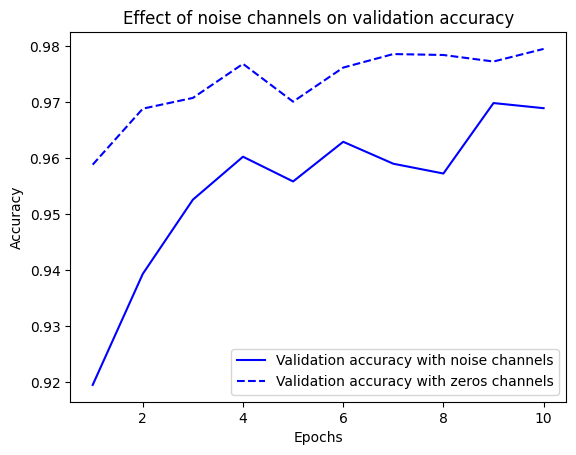

In [ ]:
val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, 'b-', label='Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b--', label='Validation accuracy with zeros channels')
plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## The manifold hypothesis
The hypothesis space from which we can sample the MNIST images, or in other words, the number of different such images that could be expected with each pixel represented in gray color with 8 bits, or $2^8 = 256$ values, and any value in that range of the 28x28=784 pixels independent from any other is ${2^8}^{784}$, or more simply $256^{784}$, a number bigger than the number of atoms in the universe. Since the real world is not completely random and there is always some correlation between neighboring pixels, the dimension of the hypothesis space is much smaller than that, and in the case of the problem at hand, the possible images representing digit numbers, is even smaller. The probability of a sample (or image in our case) can be computed by taking the derivative of the multidimensional hypothesis space in one point, we can think of it like a plane in a multidimensional space that is tangent to the hypothesis space. The derivative is called (differential) manifold, and the assumption is that in the real world that manifold can be represented by smooth functions.  

## Model's performance evaluation
A neural network model is a function that fits an unknown function that maps the input space to the output space. The quality of the fitting depends on the data points that have been used for the training: the more and closer they are in the sample space, the better is the fit between the model and the true but analytically unknown function. In order to assess the performance of a model we need to split our dataset into a training set and a test set so that we train the model with the training data set and we test its generalization performance on the test dataset. Since the evaluation is performed iteratively the most common way to train a model is to split the data into three subsets: a training data set, a validation dataset, to be used during the training iteration, and the test set. The test set should never be used more than once after the model has been trained and the validation error has been reduced to a minimum value. This technique is called **hold-out validation**. When the size of the dataset is small a better approach is to use [k-fold validation](regression.ipynb). Another version of the k-fold validation is **iterated k-fold validation with shuffling**.

## Model's baseline
Whenever we assess the performance of a model on a dataset we have to do it by confrontig the results with a baseline, a different model or algorithm that we want to beat. In a classification task a simple algorithm can be a random classifier and we want our model at least to be better than a random classifier. For the MNIST dataset a random classifier should have an accuracy of 10%, it should be able to classify a digit at random in one of the 10 classes. In a binary classification task, a random classifier should have an accuracy of 50%. If the dataset is skewed, we have to assess the performance of a random classifier on that dataset and compare our model with that.

## Tuning the training parameters
When we train a model we have to set several parameters that affect the result of the training process: the optimizer, the learning rate, the validation split, the batch size, the number of epochs. We can see the impact of the parameter settings for instance by training a MNIST digit classifier using a learning rate of 1.0 for which we achieve a validation accuracy of 0.26  and the lowering it to 0.01 for which we achieve a validation accuracy of 0.97.

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
learning_rate = 1e-2
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.3744 - accuracy: 0.9095 - val_loss: 0.1137 - val_accuracy: 0.9663
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1250 - accuracy: 0.9650 - val_loss: 0.1332 - val_accuracy: 0.9680
Epoch 3/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0999 - accuracy: 0.9739 - val_loss: 0.1603 - val_accuracy: 0.9655
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0840 - accuracy: 0.9786 - val_loss: 0.1661 - val_accuracy: 0.9672
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0667 - accuracy: 0.9827 - val_loss: 0.1790 - val_accuracy: 0.9705
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0600 - accuracy: 0.9847 - val_loss: 0.2095 - val_accuracy: 0.9683
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0562 - accuracy: 0.9869 - val_loss: 0.1935 - val_accuracy: 0.9722

## Choosing an architecture depending on the data set and the task at hand
Different NN architectures have been proposed to address several tasks in NLP and computer vision and other fields using text and images. Very likely we can find the architecture more appropriate for our task and data from the literature.

## Model capacity
In order to achieve the best performance we have to increase our model capacity, that is its number of layers and units per layer, to see whether it improves the performance or it starts overfitting. In case we see overfitting we can decrease the model capacity. For instance we can see the effect of using a model with only one layer with 10 units for the MNIST digits classification task: the validation accuracy, that is the accuracy on the validation set, doesn't go beyond 0.93 and it is far from overfitting.

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_small_model = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6703 - accuracy: 0.8342 - val_loss: 0.3612 - val_accuracy: 0.9047
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3536 - accuracy: 0.9029 - val_loss: 0.3109 - val_accuracy: 0.9128
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3180 - accuracy: 0.9117 - val_loss: 0.2921 - val_accuracy: 0.9199
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3018 - accuracy: 0.9159 - val_loss: 0.2852 - val_accuracy: 0.9223
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2922 - accuracy: 0.9186 - val_loss: 0.2795 - val_accuracy: 0.9233
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2857 - accuracy: 0.9204 - val_loss: 0.2746 - val_accuracy: 0.9238
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2807 - accuracy: 0.9215 - val_loss: 0.2730 - val_accuracy: 0.9257
Epoch 

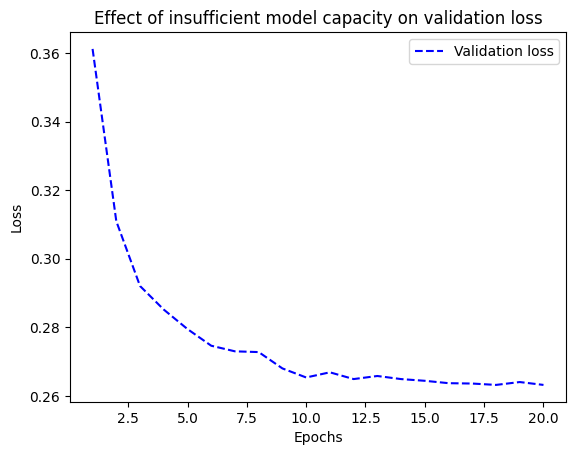

In [ ]:
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

We try a model with a bigger capacity. We can see that the validation accuracy achieves 0.97 after 6 epochs

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_large_model = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3701 - accuracy: 0.8965 - val_loss: 0.1999 - val_accuracy: 0.9434
Epoch 2/20
375/375 [==============================] - 2s 7ms/step - loss: 0.1652 - accuracy: 0.9514 - val_loss: 0.1448 - val_accuracy: 0.9574
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1169 - accuracy: 0.9647 - val_loss: 0.1161 - val_accuracy: 0.9661
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0894 - accuracy: 0.9733 - val_loss: 0.1061 - val_accuracy: 0.9686
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0712 - accuracy: 0.9789 - val_loss: 0.1049 - val_accuracy: 0.9707
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0586 - accuracy: 0.9815 - val_loss: 0.0931 - val_accuracy: 0.9741
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0492 - accuracy: 0.9850 - val_loss: 0.1011 - val_accuracy: 0.9721
Epoch 

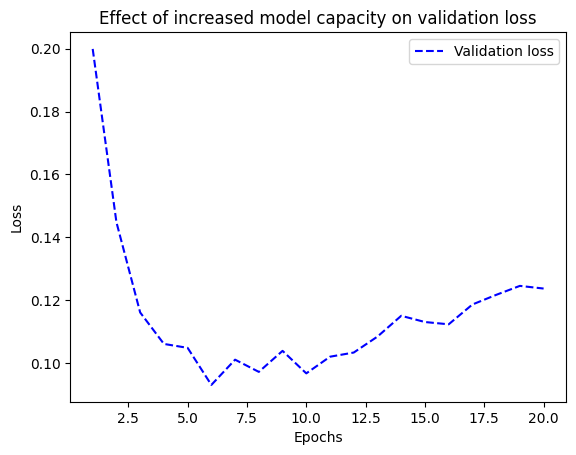

In [ ]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Effect of increased model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Tuning the network capacity
In order to build the best model for our dataset we have to change its capacity till it achieves the best result. This is done by increasing the number of units of a layer, or its size, or by adding more layers. When our model starts to overfit, we can reduce its size to reduce overfitting and mantaining its generalization skill. We use a model for binary classification to show the network tuning workflow

In [ ]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_original = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 72ms/step - loss: 0.5221 - accuracy: 0.7693 - val_loss: 0.4612 - val_accuracy: 0.7832
Epoch 2/20
30/30 [==============================] - 1s 50ms/step - loss: 0.3221 - accuracy: 0.8925 - val_loss: 0.3084 - val_accuracy: 0.8865
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2387 - accuracy: 0.9216 - val_loss: 0.2824 - val_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1925 - accuracy: 0.9377 - val_loss: 0.2757 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1578 - accuracy: 0.9492 - val_loss: 0.3285 - val_accuracy: 0.8694
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1316 - accuracy: 0.9591 - val_loss: 0.2875 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1114 - accuracy: 0.9655 - val_loss: 0.3542 - val_accuracy: 0.8710
Epoch 8/20
30

We run another model with a smaller size to see the difference in performance

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_smaller_model = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 106ms/step - loss: 0.6380 - accuracy: 0.5713 - val_loss: 0.5901 - val_accuracy: 0.5970
Epoch 2/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5527 - accuracy: 0.6976 - val_loss: 0.5426 - val_accuracy: 0.7124
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.5028 - accuracy: 0.8125 - val_loss: 0.5057 - val_accuracy: 0.8440
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.4666 - accuracy: 0.8697 - val_loss: 0.4821 - val_accuracy: 0.8556
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4369 - accuracy: 0.8988 - val_loss: 0.4669 - val_accuracy: 0.8562
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4125 - accuracy: 0.9160 - val_loss: 0.4580 - val_accuracy: 0.8574
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3922 - accuracy: 0.9303 - val_loss: 0.4461 - val_accuracy: 0.8723
Epoch 8/20
3

We can see that the larger model achieves a lower validation loss after 4 epoches but starts to overfit more rapidly than the smaller model.

<ipython-input-17-8308aa8686f0>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_small, "b--", label="Validation loss small model", color="orange")
<ipython-input-17-8308aa8686f0>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_original, "b--", label="Validation loss original model", color="green")


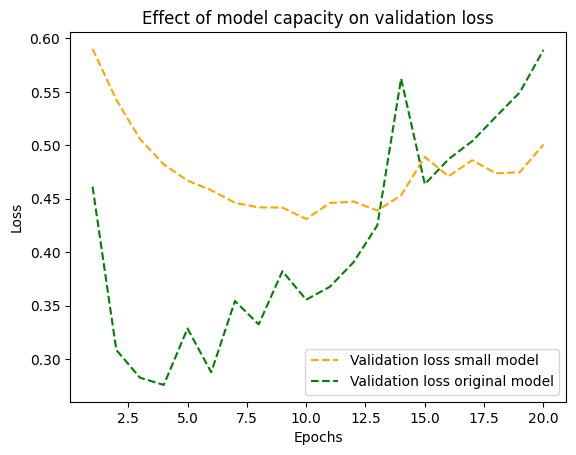

In [ ]:
val_loss_small = history_smaller_model.history["val_loss"]
val_loss_original = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_small, "b--", label="Validation loss small model", color="orange")
plt.plot(epochs, val_loss_original, "b--", label="Validation loss original model", color="green")
plt.title("Effect of model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Now we use a much larger model than the original one, with each layer 32 times larger than in the original model.

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_larger_model = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 12s 384ms/step - loss: 0.5830 - accuracy: 0.7038 - val_loss: 0.3713 - val_accuracy: 0.8535
Epoch 2/20
30/30 [==============================] - 14s 482ms/step - loss: 0.3247 - accuracy: 0.8683 - val_loss: 0.2842 - val_accuracy: 0.8831
Epoch 3/20
30/30 [==============================] - 10s 314ms/step - loss: 0.2468 - accuracy: 0.9015 - val_loss: 0.2693 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 11s 378ms/step - loss: 0.1934 - accuracy: 0.9273 - val_loss: 0.2745 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 11s 379ms/step - loss: 0.1394 - accuracy: 0.9464 - val_loss: 0.4355 - val_accuracy: 0.8299
Epoch 6/20
30/30 [==============================] - 13s 426ms/step - loss: 0.1197 - accuracy: 0.9538 - val_loss: 0.2878 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 12s 419ms/step - loss: 0.0867 - accuracy: 0.9716 - val_loss: 0.3311 - val_accuracy: 0.8851

We can see that the larger model starts overfitting after only three epochs and the validation loss jumps randomly up and down.

<ipython-input-19-331ad604f65c>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_larger, "b--", label="Validation loss large model", color="orange")
<ipython-input-19-331ad604f65c>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_original, "b--", label="Validation loss original model", color="green")


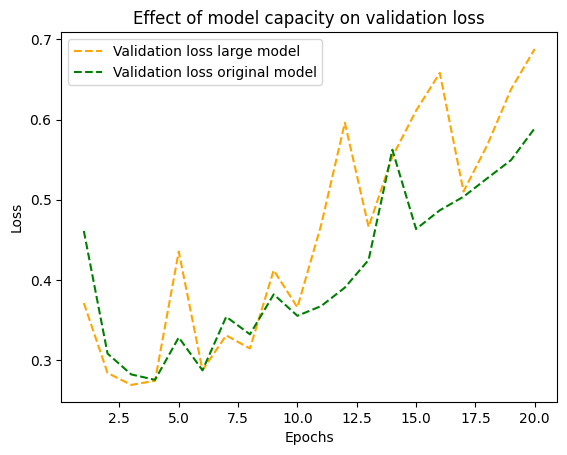

In [ ]:
val_loss_larger = history_larger_model.history["val_loss"]
val_loss_original = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_larger, "b--", label="Validation loss large model", color="orange")
plt.plot(epochs, val_loss_original, "b--", label="Validation loss original model", color="green")
plt.title("Effect of model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Weight regularization
We saw that one way to mitigate overfitting is to decrease the model's size. Another way is to put a constraint in the value the weights can take by adding a regularization term to the loss function that is proportional to the weights so that the regularization parameter is decreased when the weights are large. The most used regularization terms are L1 regularization, proportional to the absolute value of the weights, and L2 regularization, proportional to the square of the weights  

$$ℒ = \frac{1}{2}||\hat y(x, w) - y(x)||^2 + \lambda ||w||^2$$

In Keras the regularizer is added to the layers. We add the L2 regularizer to our original model for binary classification. Weight regularization is used for small networks, for larger models with millions of parameter another technique is used: dropout.

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_l2_reg = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 98ms/step - loss: 0.6348 - accuracy: 0.7611 - val_loss: 0.4950 - val_accuracy: 0.8633
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4236 - accuracy: 0.8879 - val_loss: 0.4410 - val_accuracy: 0.8468
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3402 - accuracy: 0.9119 - val_loss: 0.3712 - val_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2995 - accuracy: 0.9235 - val_loss: 0.3781 - val_accuracy: 0.8760
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2746 - accuracy: 0.9324 - val_loss: 0.3871 - val_accuracy: 0.8685
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2545 - accuracy: 0.9417 - val_loss: 0.3582 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2414 - accuracy: 0.9451 - val_loss: 0.3567 - val_accuracy: 0.8872
Epoch 8/20
30

We can see that the model with L2 regularization is more resistant to overfitting than the original model.

<ipython-input-21-0b809b990e59>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_l2_reg, "b--", label="Validation loss L2 reg. model", color="orange")
<ipython-input-21-0b809b990e59>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_original, "b--", label="Validation loss original model", color="green")


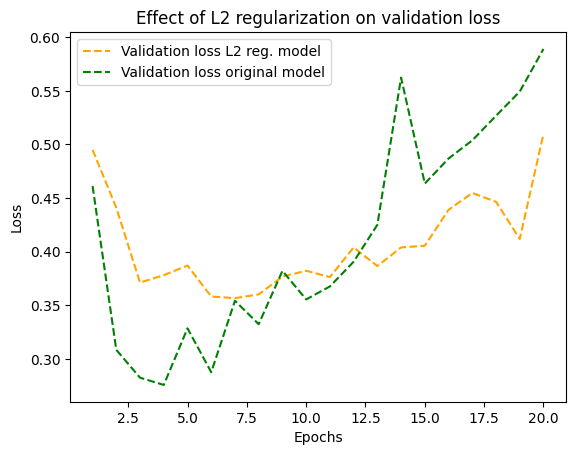

In [ ]:
val_loss_l2_reg = history_l2_reg.history["val_loss"]
val_loss_original = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_l2_reg, "b--", label="Validation loss L2 reg. model", color="orange")
plt.plot(epochs, val_loss_original, "b--", label="Validation loss original model", color="green")
plt.title("Effect of L2 regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Dropout
Dropout consists of randomly setting to zero a number of output features of a layer during training. The dropout rate is the fraction of such outputs that are zeroed out. At test time no units are dropped out but all of them are scaled down by the dropout rate to take into account that there are more units than during the training. In Keras dropout is applied to a layer by adding a Droput layer soon after it. We now apply the dropout technique while training the original model to assess the difference in performance.   

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_dropout = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 99ms/step - loss: 0.6524 - accuracy: 0.5983 - val_loss: 0.5548 - val_accuracy: 0.8406
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5438 - accuracy: 0.7309 - val_loss: 0.4513 - val_accuracy: 0.8669
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4585 - accuracy: 0.7933 - val_loss: 0.3671 - val_accuracy: 0.8777
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3954 - accuracy: 0.8354 - val_loss: 0.3196 - val_accuracy: 0.8831
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3457 - accuracy: 0.8632 - val_loss: 0.2917 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3096 - accuracy: 0.8823 - val_loss: 0.2778 - val_accuracy: 0.8925
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2716 - accuracy: 0.9045 - val_loss: 0.2768 - val_accuracy: 0.8876
Epoch 8/20
30

We can see that the validation loss with dropout is lower than with L2 regularization and the model is more resistant to overfitting than the original model without dropout.

<ipython-input-24-1dc93dec6ebc>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_dropout, "b--", label="Validation model with dropout", color="orange")
<ipython-input-24-1dc93dec6ebc>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_original, "b--", label="Validation loss original model", color="green")


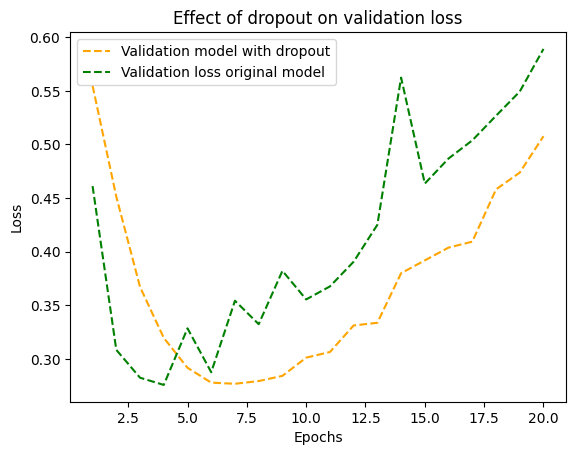

In [ ]:
val_loss_dropout = history_dropout.history["val_loss"]
val_loss_original = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_dropout, "b--", label="Validation model with dropout", color="orange")
plt.plot(epochs, val_loss_original, "b--", label="Validation loss original model", color="green")
plt.title("Effect of dropout on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Conclusion
The steps to maximize generalization and prevent overfitting are
* Get more or better training data
* Reduce the capacity (size) of the model in case of overfitting
* Add weight regularization (for small models) or dropout